In [1]:
!pip install stellargraph

Active code page: 437
  Stored in directory: C:\Users\etern\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Stored in directory: C:\Users\etern\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\etern\AppData\Local\pip\Cache\wheels\59\38\c6\234dc39b4f6951a0768fbc02d5b7207137a5b1d9094f0d54bf
  Stored in directory: C:\Users\etern\AppData\Local\pip\Cache\wheels\ab\10\93\5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built absl-py termcolor gast smart-open


In [2]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

import os
import networkx as nx
import numpy as np
import pandas as pd


from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

%matplotlib inline

## Load data and construct graph

In [3]:
! wget 'http://personal.stevens.edu/~fmai/data/cora.cites.txt'

Active code page: 437


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [0]:
! wget 'http://personal.stevens.edu/~fmai/data/cora.content'

In [4]:
data_dir = ""

Everynodes have its attribute. And have a node vectors, 

In [5]:
# load edge list
cora_location = os.path.expanduser(os.path.join(data_dir, "29_data/23_cora.cites.txt"))
g_nx = nx.read_edgelist(path=cora_location)

In [7]:
# load the node attribute data
cora_data_location = os.path.expanduser(os.path.join(data_dir, "29_data/24_cora.content.txt"))
node_attr = pd.read_csv(cora_data_location, sep='\t', header=None)
values = { str(row.tolist()[0]): row.tolist()[-1] for _, row in node_attr.iterrows()}
nx.set_node_attributes(g_nx, values, 'subject')

In [8]:
# Select the largest connected component. For clarity we ignore isolated
# nodes and subgraphs; having these in the data does not prevent the
# algorithm from running and producing valid results.
g_nx_ccs = (g_nx.subgraph(c).copy() for c in nx.connected_components(g_nx))
g_nx = max(g_nx_ccs, key=len)
print("Largest subgraph statistics: {} nodes, {} edges".format(
    g_nx.number_of_nodes(), g_nx.number_of_edges()))

Largest subgraph statistics: 2485 nodes, 5069 edges


In [9]:
# get the the node's attribute
nx.get_node_attributes(g_nx, 'subject')

{'35': 'Genetic_Algorithms',
 '1033': 'Genetic_Algorithms',
 '103482': 'Neural_Networks',
 '103515': 'Genetic_Algorithms',
 '1050679': 'Genetic_Algorithms',
 '1103960': 'Genetic_Algorithms',
 '1103985': 'Genetic_Algorithms',
 '1109199': 'Genetic_Algorithms',
 '1112911': 'Genetic_Algorithms',
 '1113438': 'Genetic_Algorithms',
 '1113831': 'Genetic_Algorithms',
 '1114331': 'Genetic_Algorithms',
 '1117476': 'Genetic_Algorithms',
 '1119505': 'Genetic_Algorithms',
 '1119708': 'Genetic_Algorithms',
 '1120431': 'Neural_Networks',
 '1123756': 'Genetic_Algorithms',
 '1125386': 'Theory',
 '1127430': 'Genetic_Algorithms',
 '1127913': 'Genetic_Algorithms',
 '1128204': 'Genetic_Algorithms',
 '1128227': 'Genetic_Algorithms',
 '1128314': 'Genetic_Algorithms',
 '1128453': 'Genetic_Algorithms',
 '1128945': 'Genetic_Algorithms',
 '1128959': 'Genetic_Algorithms',
 '1128985': 'Genetic_Algorithms',
 '1129018': 'Genetic_Algorithms',
 '1129027': 'Genetic_Algorithms',
 '1129573': 'Genetic_Algorithms',
 '112968

In [10]:
# random choose node'35'
g_nx.node['35']

{'subject': 'Genetic_Algorithms'}

## Train node2vec 

In [11]:
# random walk
rw = BiasedRandomWalk(StellarGraph(g_nx))

walks = rw.run(nodes=list(g_nx.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=10,        # number of random walks per root node 
               p=0.5,       # Defines (unormalised) probability, 1/p, of returning to source node
               q=2.0        # Defines (unormalised) probability, 1/q, for moving away from source node
              )
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 24850


In [13]:
walks[200]

['1128204',
 '58758',
 '1688',
 '69284',
 '1688',
 '1134022',
 '1688',
 '39474',
 '1688',
 '1133338',
 '1688',
 '694759',
 '35',
 '1127913',
 '35',
 '646837',
 '35',
 '1128945',
 '35',
 '56119',
 '56112',
 '56119',
 '56115',
 '1104999',
 '56119',
 '35',
 '1125386',
 '35',
 '1153577',
 '503883',
 '1153577',
 '33895',
 '82087',
 '3229',
 '390922',
 '3229',
 '1130931',
 '3229',
 '1152673',
 '3229',
 '1152673',
 '3229',
 '100197',
 '447250',
 '240321',
 '1132434',
 '147870',
 '1132434',
 '147870',
 '1132434',
 '240321',
 '1132434',
 '240321',
 '675649',
 '240321',
 '428610',
 '240321',
 '69392',
 '1365',
 '85299',
 '1365',
 '1114605',
 '1365',
 '188471',
 '628500',
 '188471',
 '4584',
 '1120020',
 '6213',
 '4584',
 '1272',
 '254923',
 '1272',
 '85688',
 '1272',
 '20593',
 '1272',
 '27230',
 '1272',
 '552469',
 '10169',
 '1107067',
 '6334',
 '1152448',
 '36162',
 '197452',
 '36162',
 '20528',
 '36162',
 '1132815',
 '36162',
 '20528',
 '36167',
 '20528',
 '1103676',
 '20528',
 '1107067',
 '2

In [12]:
# use word2vec to get the new attribute
from gensim.models import Word2Vec

model = Word2Vec(walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

In [14]:
# The embedding vectors can be retrieved from model.wv using the node ID as key.
model.wv['19231'].shape

(128,)

In [15]:
model.wv['19231']

array([-0.33374974, -0.9017957 , -0.0402576 , -0.08731005, -0.1306435 ,
        0.18941374, -0.3227127 , -0.23299254,  0.64869845, -0.13424215,
       -0.25298724, -0.58992326, -0.26353118, -0.02674471,  0.3636066 ,
       -0.55982494, -0.06060719, -0.7146134 , -0.43167087, -0.40945923,
        0.2770915 , -0.47977507, -0.6488506 , -0.38245493, -0.23806742,
       -0.3041745 , -1.0317488 , -0.3049815 ,  0.4005606 , -0.62747425,
       -0.50956094, -0.73998344, -0.2766764 ,  0.96769154,  0.02329359,
       -0.01438298,  0.00829122,  0.41279787, -0.2894765 ,  0.19528839,
       -0.29610714,  0.0170134 ,  0.0187502 ,  0.05227216,  0.12791732,
        0.4478672 ,  0.09138793,  0.11322848, -0.39317012, -0.03518198,
        0.7179701 ,  0.33814594,  0.49853083,  0.41314742, -0.25798106,
       -0.1607243 ,  0.34663892,  0.16356228, -0.14053543, -0.66152006,
       -0.28555882, -0.5521197 ,  0.25082758, -0.07407598,  0.07767242,
        0.18765916, -0.6930077 ,  0.27740937,  0.15759544, -0.19

In [16]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ g_nx.node[node_id]['subject'] for node_id in node_ids]

In [17]:
node_embeddings.shape

(2485, 128)

In [18]:
node_embeddings

array([[ 0.1371012 , -0.27191964,  0.30253515, ...,  0.03994992,
        -0.07316298,  0.59280825],
       [ 0.09984974, -0.13498603,  0.34541243, ...,  0.1755868 ,
        -0.27509803, -0.3776751 ],
       [-0.19603771, -0.48632964,  0.1647134 , ...,  0.455884  ,
        -0.25994167,  0.4876949 ],
       ...,
       [ 0.15936492, -0.2925675 , -0.03180692, ..., -0.4583874 ,
         0.64191   ,  0.13067149],
       [-0.14138755, -0.5980253 ,  0.26518127, ...,  0.34895688,
        -0.15975483,  0.3531215 ],
       [-0.5216696 , -0.48023516,  0.8125168 , ...,  0.29920658,
        -0.2184757 ,  0.26247194]], dtype=float32)

In [19]:
# Apply t-SNE transformation on node embeddings to reduce the dimension to 2
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

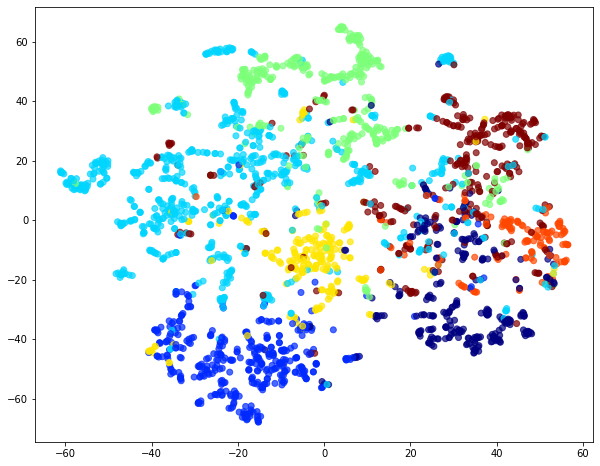

In [20]:
# draw the points
alpha=0.7
label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(10,8))
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, cmap="jet", alpha=alpha)

### Predict class (subject) using node vectors


In [21]:
# X will hold the 128-dimensional input features
X = node_embeddings  
# y holds the corresponding target values
y = np.array(node_targets)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=None)

In [23]:
print("Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Array shapes:
 X_train = (248, 128)
 y_train = (248,)
 X_test = (2237, 128)
 y_test = (2237,)


In [24]:
clf = LogisticRegressionCV( Cs=10, 
                            cv=3, 
                            scoring="accuracy",
                            verbose=False,
                            multi_class='ovr')
clf.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring='accuracy',
                     solver='lbfgs', tol=0.0001, verbose=False)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.743406347787215